In [1]:
import pandas as pd
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cleaned_data_v2 = pd.read_csv('cleaned_data_v2.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1'])
#Predictors = pd.read_csv('Predictors.csv').drop(columns=['Description', 'Values', 'Tab in Excel Sheet'])

In [2]:
# Make Predictors just categorical
#L = []
#j = 0
#for i in Predictors['Data Type']:
#    if i.split(' ')[0] == 'Categorical':
#        L.append(i.split(' ')[0])
#    else:
#        Predictors = Predictors.drop([j])
#    j += 1
#Categorical_features = Predictors['Column Name'].drop(columns=['Data Type']).tolist()

In [3]:
# Filter data for just categorical
#for i in Cleaned_data_v2:
#    if i not in Categorical_features:
#        Cleaned_data_v2 = Cleaned_data_v2.drop(columns=[i])

#Categorical_data = Cleaned_data_v2

In [4]:
#Source: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in Cleaned_data_v2.columns :
    data_encoded[i]=label.fit_transform(Cleaned_data_v2[i])

In [5]:
# Building of Cramer's V
def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [7]:
# Building of the matrix
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
Categorical_Integer_CM = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

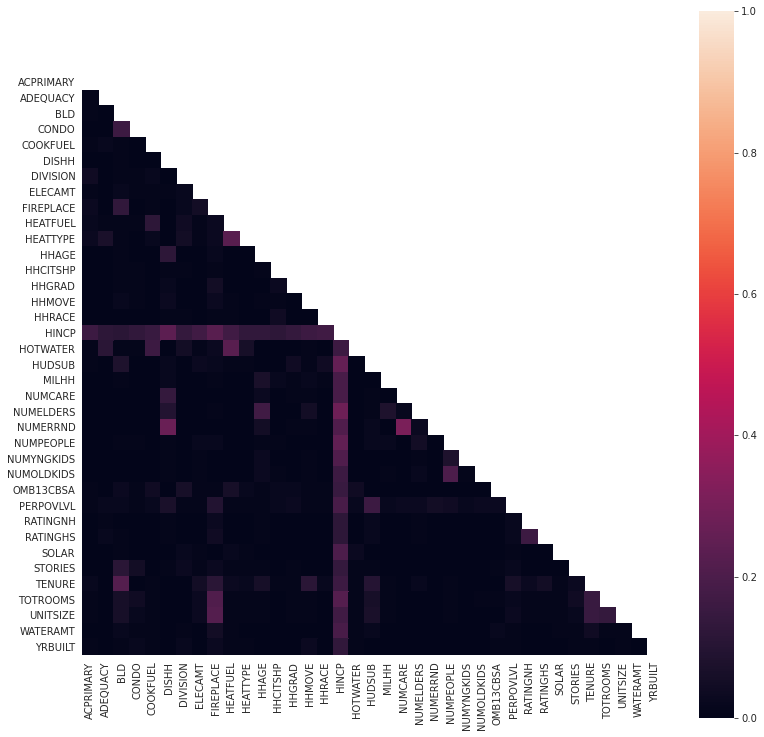

In [29]:
# Creating a correlation heatmap
mask = np.zeros_like(Categorical_Integer_CM, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,13))
with sns.axes_style("white"):
    ax = sns.heatmap(Categorical_Integer_CM, mask=mask,vmin=0., vmax=1, square=True)

plt.savefig('CICM.png')
plt.show()

In [12]:
Categorical_Integer_CM

,ACPRIMARY,ADEQUACY,BLD,CONDO,COOKFUEL,DISHH,DIVISION,ELECAMT,FIREPLACE,HEATFUEL,...,PERPOVLVL,RATINGNH,RATINGHS,SOLAR,STORIES,TENURE,TOTROOMS,UNITSIZE,WATERAMT,YRBUILT
ACPRIMARY,1.00,0.01,0.01,0.00,0.01,0.00,0.04,0.01,0.03,0.02,...,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.01
ADEQUACY,0.01,1.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,...,0.02,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BLD,0.01,0.00,1.00,0.16,0.01,0.01,0.01,0.02,0.13,0.01,...,0.02,0.00,0.01,0.01,0.11,0.22,0.06,0.06,0.02,0.01
CONDO,0.00,0.00,0.16,1.00,0.00,0.00,0.01,0.01,0.00,0.01,...,0.01,0.00,0.00,0.00,0.05,0.00,0.04,0.02,0.01,0.02
COOKFUEL,0.01,0.02,0.01,0.00,1.00,0.00,0.02,0.01,0.01,0.12,...,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01
DISHH,0.00,0.00,0.01,0.00,0.00,1.00,0.00,0.01,0.00,0.00,...,0.07,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00
DIVISION,0.04,0.00,0.01,0.01,0.02,0.00,1.00,0.02,0.02,0.04,...,0.01,0.00,0.00,0.02,0.03,0.00,0.00,0.00,0.01,0.02
ELECAMT,0.01,0.00,0.02,0.01,0.01,0.01,0.02,1.00,0.05,0.01,...,0.01,0.00,0.00,0.01,0.01,0.05,0.03,0.03,0.00,0.00
FIREPLACE,0.03,0.00,0.13,0.00,0.01,0.00,0.02,0.05,1.00,0.03,...,0.09,0.03,0.04,0.00,0.03,0.11,0.21,0.22,0.05,0.03
HEATFUEL,0.02,0.01,0.01,0.01,0.12,0.00,0.04,0.01,0.03,1.00,...,0.01,0.00,0.00,0.02,0.01,0.03,0.01,0.01,0.01,0.01


In [13]:
Cleaned_data_v2

,ACPRIMARY,ADEQUACY,BLD,CONDO,COOKFUEL,DISHH,DIVISION,ELECAMT,FIREPLACE,HEATFUEL,...,PERPOVLVL,RATINGNH,RATINGHS,SOLAR,STORIES,TENURE,TOTROOMS,UNITSIZE,WATERAMT,YRBUILT
0,1,1,2,0,1,0.0,5,230.0,1,2,...,501.0,9.0,9.0,0.0,2,1.0,8,6.0,80.0,2000
1,6,1,2,0,1,1.0,1,190.0,1,2,...,501.0,10.0,10.0,0.0,2,1.0,7,8.0,20.0,1970
2,1,1,2,0,2,1.0,7,100.0,1,2,...,437.0,9.0,9.0,0.0,1,1.0,8,6.0,0.0,1970
3,1,1,2,0,2,1.0,4,100.0,0,2,...,133.0,8.0,8.0,0.0,1,2.0,5,3.0,80.0,1930
4,5,1,7,0,1,0.0,7,100.0,0,1,...,85.0,5.0,6.0,0.0,2,2.0,4,2.0,0.0,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45347,1,1,3,0,1,0.0,3,90.0,0,1,...,501.0,10.0,10.0,0.0,3,1.0,8,9.0,240.0,2016
45348,1,1,2,0,1,0.0,5,140.0,0,1,...,501.0,10.0,9.0,0.0,1,1.0,6,5.0,0.0,2018
45349,1,1,2,0,1,0.0,5,260.0,0,1,...,501.0,10.0,10.0,0.0,2,1.0,6,6.0,0.0,2018
45350,1,1,2,0,2,1.0,5,80.0,0,1,...,501.0,10.0,10.0,0.0,1,1.0,6,7.0,40.0,2018
